In [43]:
import pandas as pd
from google.cloud import bigquery

import matplotlib.pyplot as plt

client = bigquery.Client()

In [44]:
residentes_com_plano = """
select
 pk_indicador
,indicador
,variavel_abertura_2
,categoria_abertura_2
,sum(cast(replace(maio,' ','') as int)) as maio
,sum(cast(replace(junho,' ','') as int)) as junho
,sum(cast(replace(julho,' ','') as int)) as julho
 from `pnad_covid.tb_pais`
where
tipo_dado = 'quantidade' and
maio is not null and junho is not null and julho is not null
and pk_indicador = 126
and variavel_abertura_1 = 'Grupos de Idade 2'
and categoria_abertura_2 is not null
group by
pk_indicador
,indicador
,variavel_abertura_2
,categoria_abertura_2

"""

df_residentes_com_plano= client.query(residentes_com_plano).to_dataframe()

In [45]:
df_melt_geral = pd.melt(df_residentes_com_plano,id_vars=['pk_indicador','indicador','variavel_abertura_2','categoria_abertura_2'],var_name='mes',value_name='qtd')

In [46]:
df_melt_geral

,pk_indicador,indicador,variavel_abertura_2,categoria_abertura_2,mes,qtd
0,126,População residente (mil pessoas),Plano de Saúde Médico,Não tem plano de saúde médico,maio,148761
1,126,População residente (mil pessoas),Plano de Saúde Médico,Tem plano de saúde médico,maio,61541
2,126,População residente (mil pessoas),Plano de Saúde Médico,Não tem plano de saúde médico,junho,152541
3,126,População residente (mil pessoas),Plano de Saúde Médico,Tem plano de saúde médico,junho,56850
4,126,População residente (mil pessoas),Plano de Saúde Médico,Não tem plano de saúde médico,julho,153307
5,126,População residente (mil pessoas),Plano de Saúde Médico,Tem plano de saúde médico,julho,56635


In [47]:
df_melt_julho = df_melt_geral[df_melt_geral['mes']=='julho']

In [48]:
df_melt_julho['total'] = df_melt_julho['qtd'].sum()
df_melt_julho['%'] = df_melt_julho['qtd']/df_melt_julho['total']

<ipython-input-48-bed157f9de6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_melt_julho['total'] = df_melt_julho['qtd'].sum()
<ipython-input-48-bed157f9de6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_melt_julho['%'] = df_melt_julho['qtd']/df_melt_julho['total']


In [49]:
df_melt_julho

,pk_indicador,indicador,variavel_abertura_2,categoria_abertura_2,mes,qtd,total,%
4,126,População residente (mil pessoas),Plano de Saúde Médico,Não tem plano de saúde médico,julho,153307,209942,0.730235
5,126,População residente (mil pessoas),Plano de Saúde Médico,Tem plano de saúde médico,julho,56635,209942,0.269765


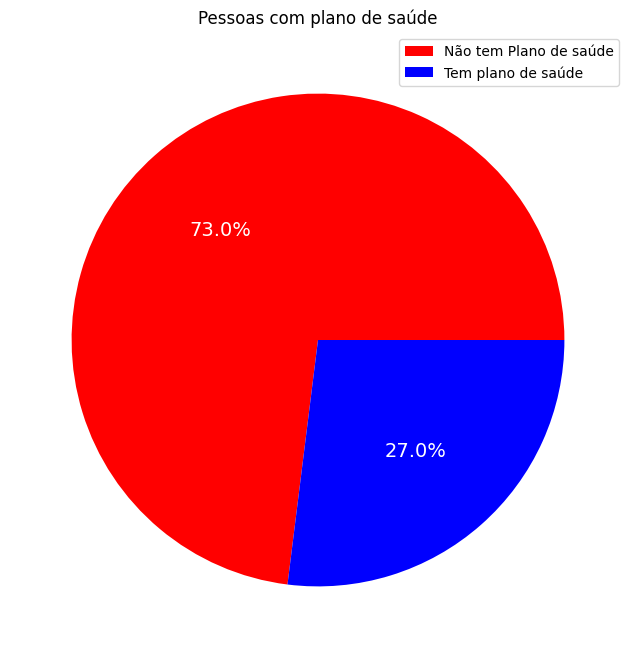

In [50]:
labels = ['Não tem Plano de saúde', 'Tem plano de saúde']
sizes = [8, 8]
colors = ['red', 'blue']



graf = df_melt_julho.plot.pie(y='%',figsize=sizes, colors=colors, autopct='%1.1f%%',textprops={'color': 'white', 'fontsize': 14})
plt.title('Pessoas com plano de saúde')
plt.axis('off')
plt.legend(labels, loc="best")

plt.show()

In [51]:
residentes_regiao = """
select
 pk_indicador
,indicador
,abertura_territorio
,case when categoria_abertura_1 like '%59%' then 'ate 59 anos' else 'mais 60 anos' end as categoria_abertura_1
,variavel_abertura_2
,categoria_abertura_2
,sum(cast(replace(maio,' ','') as int)) as maio
,sum(cast(replace(junho,' ','') as int)) as junho
,sum(cast(replace(julho,' ','') as int)) as julho
 from `pnad_covid.tb_regiao`
where
tipo_dado = 'quantidade' and
maio is not null and junho is not null and julho is not null
and pk_indicador = 126
and variavel_abertura_1 = 'Grupos de Idade 2'
and categoria_abertura_2 is not null
group by
pk_indicador
,categoria_abertura_1
,indicador
,variavel_abertura_2
,categoria_abertura_2
,abertura_territorio
"""

df_residentes_regiao= client.query(residentes_regiao).to_dataframe()

In [52]:
df_residentes_regiao

,pk_indicador,indicador,abertura_territorio,categoria_abertura_1,variavel_abertura_2,categoria_abertura_2,maio,junho,julho
0,126,População residente (mil pessoas),Sul,ate 59 anos,Plano de Saúde Médico,Tem plano de saúde médico,8492,7746,7774
1,126,População residente (mil pessoas),Nordeste,ate 59 anos,Plano de Saúde Médico,Não tem plano de saúde médico,41638,42164,42398
2,126,População residente (mil pessoas),Norte,ate 59 anos,Plano de Saúde Médico,Tem plano de saúde médico,2329,2012,1961
3,126,População residente (mil pessoas),CentroOeste,ate 59 anos,Plano de Saúde Médico,Não tem plano de saúde médico,10187,10305,10474
4,126,População residente (mil pessoas),Norte,ate 59 anos,Plano de Saúde Médico,Não tem plano de saúde médico,14330,14567,14652
5,126,População residente (mil pessoas),Sudeste,ate 59 anos,Plano de Saúde Médico,Não tem plano de saúde médico,46381,48067,48144
6,126,População residente (mil pessoas),Sudeste,ate 59 anos,Plano de Saúde Médico,Tem plano de saúde médico,28016,25912,25944
7,126,População residente (mil pessoas),CentroOeste,ate 59 anos,Plano de Saúde Médico,Tem plano de saúde médico,4175,3962,3859
8,126,População residente (mil pessoas),Sul,ate 59 anos,Plano de Saúde Médico,Não tem plano de saúde médico,16594,17202,17241
9,126,População residente (mil pessoas),Nordeste,ate 59 anos,Plano de Saúde Médico,Tem plano de saúde médico,8271,7583,7448


In [53]:
df_60_filtro = df_residentes_regiao[df_residentes_regiao['categoria_abertura_1']=='mais 60 anos']

In [54]:
df_melt = pd.melt(df_60_filtro,id_vars=['pk_indicador','indicador','abertura_territorio','variavel_abertura_2','categoria_abertura_2','categoria_abertura_1'],var_name = 'mes',value_name='qtd')

##MAIO

In [55]:
df_maio = df_melt[df_melt['mes']=='maio']

###SUL

In [56]:
df_maio_sul = df_maio[df_maio['abertura_territorio']=='Sul']
df_maio_sul['total']=df_maio_sul['qtd'].sum()
df_maio_sul['%'] = df_maio_sul['qtd']/df_maio_sul['total'] *100
df_maio_sul['%'] = df_maio_sul['%'].round(2)

<ipython-input-56-d19a3907435e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maio_sul['total']=df_maio_sul['qtd'].sum()
<ipython-input-56-d19a3907435e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maio_sul['%'] = df_maio_sul['qtd']/df_maio_sul['total'] *100
<ipython-input-56-d19a3907435e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

###Sudeste

In [57]:
df_maio_sudeste = df_maio[df_maio['abertura_territorio']=='Sudeste']
df_maio_sudeste['total']=df_maio_sudeste['qtd'].sum()
df_maio_sudeste['%'] = df_maio_sudeste['qtd']/df_maio_sudeste['total'] *100
df_maio_sudeste['%'] = df_maio_sudeste['%'].round(2)

<ipython-input-57-6297db76e41d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maio_sudeste['total']=df_maio_sudeste['qtd'].sum()
<ipython-input-57-6297db76e41d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maio_sudeste['%'] = df_maio_sudeste['qtd']/df_maio_sudeste['total'] *100
<ipython-input-57-6297db76e41d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

###Nordeste

In [58]:
df_maio_nordeste = df_maio[df_maio['abertura_territorio']=='Nordeste']
df_maio_nordeste['total']=df_maio_nordeste['qtd'].sum()
df_maio_nordeste['%'] = df_maio_nordeste['qtd']/df_maio_nordeste['total'] *100
df_maio_nordeste['%'] = df_maio_nordeste['%'].round(2)

<ipython-input-58-0d23ef15b99a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maio_nordeste['total']=df_maio_nordeste['qtd'].sum()
<ipython-input-58-0d23ef15b99a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maio_nordeste['%'] = df_maio_nordeste['qtd']/df_maio_nordeste['total'] *100
<ipython-input-58-0d23ef15b99a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

###Centro

In [59]:
df_maio_centro = df_maio[df_maio['abertura_territorio']=='CentroOeste']
df_maio_centro['total']=df_maio_centro['qtd'].sum()
df_maio_centro['%'] = df_maio_centro['qtd']/df_maio_centro['total'] *100
df_maio_centro['%'] = df_maio_centro['%'].round(2)

<ipython-input-59-f2bc2666e57a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maio_centro['total']=df_maio_centro['qtd'].sum()
<ipython-input-59-f2bc2666e57a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maio_centro['%'] = df_maio_centro['qtd']/df_maio_centro['total'] *100
<ipython-input-59-f2bc2666e57a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

###Norte

In [60]:
df_maio_norte = df_maio[df_maio['abertura_territorio']=='Norte']
df_maio_norte['total']=df_maio_norte['qtd'].sum()
df_maio_norte['%'] = df_maio_norte['qtd']/df_maio_norte['total'] *100
df_maio_norte['%'] = df_maio_norte['%'].round(2)

<ipython-input-60-3244f8f02a6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maio_norte['total']=df_maio_norte['qtd'].sum()
<ipython-input-60-3244f8f02a6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maio_norte['%'] = df_maio_norte['qtd']/df_maio_norte['total'] *100
<ipython-input-60-3244f8f02a6f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

###maio consolidado

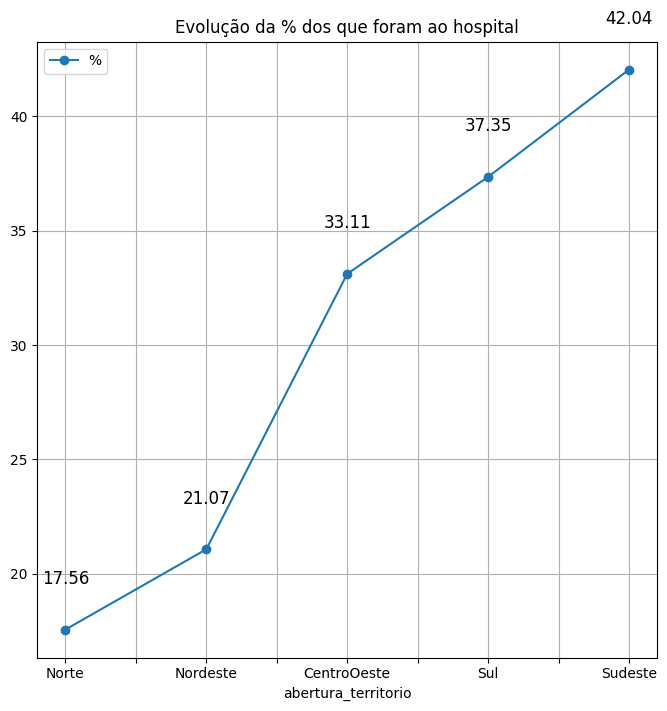

In [61]:
df_maio_consolidado = pd.concat([df_maio_sul,df_maio_sudeste,df_maio_nordeste,df_maio_centro,df_maio_norte])
df_maio_consolidado_plano = df_maio_consolidado[df_maio_consolidado['categoria_abertura_2']=='Tem plano de saúde médico']

df_maio_consolidado_plano = df_maio_consolidado_plano.sort_values(by='%')
ax=df_maio_consolidado_plano.plot(kind='line',marker = 'o',figsize=(8,8),y='%',x='abertura_territorio',)
for i, v in enumerate(df_maio_consolidado_plano['%']):
    ax.text(i, v + 2, str(v), ha='center', fontsize=12)

plt.title('Evolução da % dos que foram ao hospital')
plt.legend(loc='best')
plt.grid(True)

##Junho

In [62]:
df_junho = df_melt[df_melt['mes']=='junho']

###SUL

In [63]:
df_junho_sul = df_junho[df_junho['abertura_territorio']=='Sul']
df_junho_sul['total']=df_junho_sul['qtd'].sum()
df_junho_sul['%'] = df_junho_sul['qtd']/df_junho_sul['total'] *100
df_junho_sul['%'] = df_junho_sul['%'].round(2)

<ipython-input-63-410ff529310d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_junho_sul['total']=df_junho_sul['qtd'].sum()
<ipython-input-63-410ff529310d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_junho_sul['%'] = df_junho_sul['qtd']/df_junho_sul['total'] *100
<ipython-input-63-410ff529310d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

###Sudeste

In [64]:
df_junho_sudeste = df_junho[df_junho['abertura_territorio']=='Sudeste']
df_junho_sudeste['total']=df_junho_sudeste['qtd'].sum()
df_junho_sudeste['%'] = df_junho_sudeste['qtd']/df_junho_sudeste['total'] *100
df_junho_sudeste['%'] = df_junho_sudeste['%'].round(2)

<ipython-input-64-b5c4ca920d87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_junho_sudeste['total']=df_junho_sudeste['qtd'].sum()
<ipython-input-64-b5c4ca920d87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_junho_sudeste['%'] = df_junho_sudeste['qtd']/df_junho_sudeste['total'] *100
<ipython-input-64-b5c4ca920d87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

###Nordeste

In [65]:
df_junho_nordeste = df_junho[df_junho['abertura_territorio']=='Nordeste']
df_junho_nordeste['total']=df_junho_nordeste['qtd'].sum()
df_junho_nordeste['%'] = df_junho_nordeste['qtd']/df_junho_nordeste['total'] *100
df_junho_nordeste['%'] = df_junho_nordeste['%'].round(2)

<ipython-input-65-c6c8b5942e17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_junho_nordeste['total']=df_junho_nordeste['qtd'].sum()
<ipython-input-65-c6c8b5942e17>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_junho_nordeste['%'] = df_junho_nordeste['qtd']/df_junho_nordeste['total'] *100
<ipython-input-65-c6c8b5942e17>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

###Centro

In [66]:
df_junho_centro = df_junho[df_junho['abertura_territorio']=='CentroOeste']
df_junho_centro['total']=df_junho_centro['qtd'].sum()
df_junho_centro['%'] = df_junho_centro['qtd']/df_junho_centro['total'] *100
df_junho_centro['%'] = df_junho_centro['%'].round(2)

<ipython-input-66-3fdf271e15eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_junho_centro['total']=df_junho_centro['qtd'].sum()
<ipython-input-66-3fdf271e15eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_junho_centro['%'] = df_junho_centro['qtd']/df_junho_centro['total'] *100
<ipython-input-66-3fdf271e15eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

###Norte

In [67]:
df_junho_norte = df_junho[df_junho['abertura_territorio']=='Norte']
df_junho_norte['total']=df_junho_norte['qtd'].sum()
df_junho_norte['%'] = df_junho_norte['qtd']/df_junho_norte['total'] *100
df_junho_norte['%'] = df_junho_norte['%'].round(2)

<ipython-input-67-0ee4ef010441>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_junho_norte['total']=df_junho_norte['qtd'].sum()
<ipython-input-67-0ee4ef010441>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_junho_norte['%'] = df_junho_norte['qtd']/df_junho_norte['total'] *100
<ipython-input-67-0ee4ef010441>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

###junho consolidado

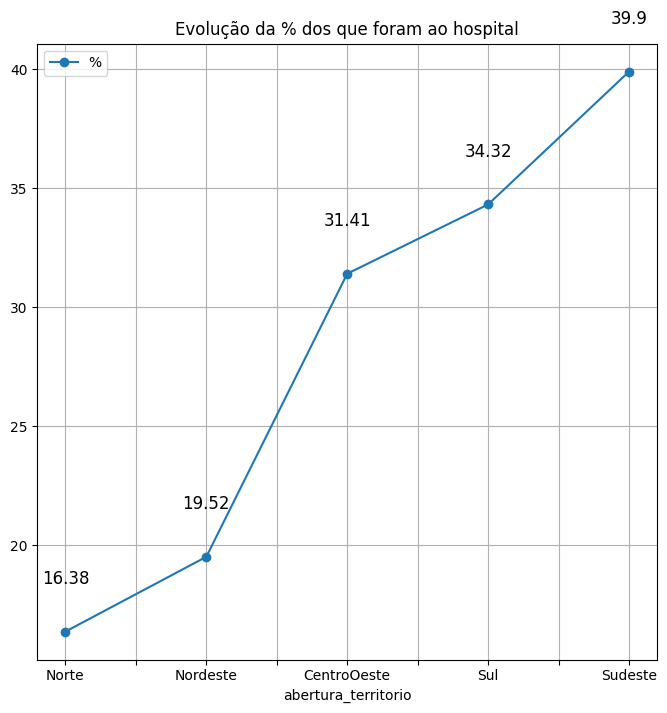

In [68]:
df_junho_consolidado = pd.concat([df_junho_sul,df_junho_sudeste,df_junho_nordeste,df_junho_centro,df_junho_norte])
df_junho_consolidado_plano = df_junho_consolidado[df_junho_consolidado['categoria_abertura_2']=='Tem plano de saúde médico']

df_junho_consolidado_plano = df_junho_consolidado_plano.sort_values(by='%')
ax=df_junho_consolidado_plano.plot(kind='line',marker = 'o',figsize=(8,8),y='%',x='abertura_territorio',)
for i, v in enumerate(df_junho_consolidado_plano['%']):
    ax.text(i, v + 2, str(v), ha='center', fontsize=12)
plt.title('Evolução da % dos que foram ao hospital')
plt.legend(loc='best')
plt.grid(True)

##Julho

In [69]:
df_julho = df_melt[df_melt['mes']=='julho']

###SUL

In [70]:
df_julho_sul = df_julho[df_julho['abertura_territorio']=='Sul']
df_julho_sul['total']=df_julho_sul['qtd'].sum()
df_julho_sul['%'] = df_julho_sul['qtd']/df_julho_sul['total'] *100
df_julho_sul['%'] = df_julho_sul['%'].round(2)

<ipython-input-70-9b7a636d88c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_julho_sul['total']=df_julho_sul['qtd'].sum()
<ipython-input-70-9b7a636d88c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_julho_sul['%'] = df_julho_sul['qtd']/df_julho_sul['total'] *100
<ipython-input-70-9b7a636d88c5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

###Sudeste

In [71]:
df_julho_sudeste = df_julho[df_julho['abertura_territorio']=='Sudeste']
df_julho_sudeste['total']=df_julho_sudeste['qtd'].sum()
df_julho_sudeste['%'] = df_julho_sudeste['qtd']/df_julho_sudeste['total'] *100
df_julho_sudeste['%'] = df_julho_sudeste['%'].round(2)

<ipython-input-71-1df17beb4112>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_julho_sudeste['total']=df_julho_sudeste['qtd'].sum()
<ipython-input-71-1df17beb4112>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_julho_sudeste['%'] = df_julho_sudeste['qtd']/df_julho_sudeste['total'] *100
<ipython-input-71-1df17beb4112>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

###Nordeste

In [72]:
df_julho_nordeste = df_julho[df_julho['abertura_territorio']=='Nordeste']
df_julho_nordeste['total']=df_julho_nordeste['qtd'].sum()
df_julho_nordeste['%'] = df_julho_nordeste['qtd']/df_julho_nordeste['total'] *100
df_julho_nordeste['%'] = df_julho_nordeste['%'].round(2)

<ipython-input-72-bd2a5bdd4399>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_julho_nordeste['total']=df_julho_nordeste['qtd'].sum()
<ipython-input-72-bd2a5bdd4399>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_julho_nordeste['%'] = df_julho_nordeste['qtd']/df_julho_nordeste['total'] *100
<ipython-input-72-bd2a5bdd4399>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

###Centro

In [73]:
df_julho_centro = df_julho[df_julho['abertura_territorio']=='CentroOeste']
df_julho_centro['total']=df_julho_centro['qtd'].sum()
df_julho_centro['%'] = df_julho_centro['qtd']/df_julho_centro['total'] *100
df_julho_centro['%'] = df_julho_centro['%'].round(2)

<ipython-input-73-4942dc08a22c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_julho_centro['total']=df_julho_centro['qtd'].sum()
<ipython-input-73-4942dc08a22c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_julho_centro['%'] = df_julho_centro['qtd']/df_julho_centro['total'] *100
<ipython-input-73-4942dc08a22c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

###Norte

In [74]:
df_julho_norte = df_julho[df_julho['abertura_territorio']=='Norte']
df_julho_norte['total']=df_julho_norte['qtd'].sum()
df_julho_norte['%'] = df_julho_norte['qtd']/df_julho_norte['total'] *100
df_julho_norte['%'] = df_julho_norte['%'].round(2)

<ipython-input-74-8f9dd06a457d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_julho_norte['total']=df_julho_norte['qtd'].sum()
<ipython-input-74-8f9dd06a457d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_julho_norte['%'] = df_julho_norte['qtd']/df_julho_norte['total'] *100
<ipython-input-74-8f9dd06a457d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

###julho consolidado

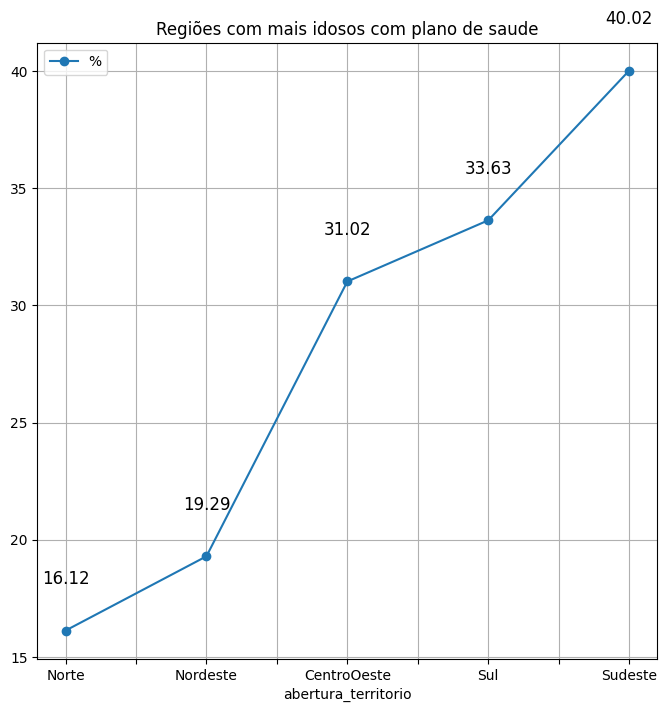

In [76]:
df_julho_consolidado = pd.concat([df_julho_sul,df_julho_sudeste,df_julho_nordeste,df_julho_centro,df_julho_norte])
df_julho_consolidado_plano = df_julho_consolidado[df_julho_consolidado['categoria_abertura_2']=='Tem plano de saúde médico']

df_julho_consolidado_plano = df_julho_consolidado_plano.sort_values(by='%')
ax=df_julho_consolidado_plano.plot(kind='line',marker = 'o',figsize=(8,8),y='%',x='abertura_territorio')
for i, v in enumerate(df_julho_consolidado_plano['%']):
    ax.text(i, v + 2, str(v), ha='center', fontsize=12)

plt.title('Regiões com mais idosos com plano de saude')
plt.legend(loc='best')
plt.grid(True)